In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # LinearRegression is a class.
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import pylab as py

In [81]:
file_path= "/content/drive/MyDrive/Colab Notebooks/AI & Machine Learning/Machine Learning/ML Practice/12.New/Boston.csv"
data=pd.read_csv(file_path)
data


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [82]:
data.head(10)

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [83]:
x=data.iloc[:,:12].values
y=data.iloc[:,12].values

"""x = data.iloc[:,:12].values: This line extracts the values from the DataFrame object data for all rows and the first 12 columns.
The .iloc attribute is used to access the DataFrame by integer-based indexing.
 The [:,:12] indexing syntax specifies all rows (indicated by :) and the first 12 columns (indicated by :12).
 The .values attribute returns the extracted values as a NumPy array and assigns it to the variable x."""

'x = data.iloc[:,:12].values: This line extracts the values from the DataFrame object data for all rows and the first 12 columns.\nThe .iloc attribute is used to access the DataFrame by integer-based indexing.\n The [:,:12] indexing syntax specifies all rows (indicated by :) and the first 12 columns (indicated by :12).\n The .values attribute returns the extracted values as a NumPy array and assigns it to the variable x.'

In [84]:
x # x must have been 2 dimentian for training.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [85]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [87]:
x.shape

(506, 12)

In [88]:
y.shape

(506,)

In [89]:
x_train.shape

(404, 12)

In [90]:
y_train.shape

(404,)

In [91]:
x_test.shape

(102, 12)

In [92]:
y_test.shape

(102,)

In [93]:
model=LinearRegression() #create a object, "model" is a variable

In [94]:
model.fit(x_train,y_train) # "fit" is a function, model created

LinearRegression()

In [95]:
model.intercept_ # beta note

43.05414355323629

# **model.intercept_**

In regression analysis, the term "model.intercept_" refers to the intercept or bias term of the regression model.

In a linear regression model, the relationship between the dependent variable (the variable you are trying to predict) and the independent variables (the variables used to predict the dependent variable) is defined by a linear equation of the form:

y = b0 + b1x1 + b2x2 + ... + bn*xn

Here, "y" represents the dependent variable, "b0" represents the intercept, "x1" to "xn" represent the independent variables, and "b1" to "bn" represent the coefficients or slopes associated with each independent variable.

The intercept, denoted as "b0" or often referred to as the bias term, represents the value of the dependent variable when all the independent variables are set to zero. It determines the starting point or the y-intercept of the regression line.

In machine learning libraries or frameworks like scikit-learn, "model.intercept_" is a property of a trained regression model that provides the estimated value of the intercept term based on the data it was trained on. It allows you to access and examine the intercept value of the model after it has been trained.

In [96]:
model.coef_ # There are 12 beta values

array([-1.16864610e-01,  5.89919351e-02,  3.13788055e-02, -1.89083776e+01,
        3.13767259e+00,  5.91799939e-03, -1.51102394e+00,  3.24766367e-01,
       -1.24228129e-02, -1.01509615e+00,  7.67905631e-03, -5.51889602e-01])

# **model.coef_**

In a regression model, the term "model.coef_" refers to the coefficients or slopes associated with the independent variables.

In a linear regression model, the relationship between the dependent variable and the independent variables is defined by the equation:

y = b0 + b1x1 + b2x2 + ... + bn*xn

Here, "y" represents the dependent variable, "b0" represents the intercept, "x1" to "xn" represent the independent variables, and "b1" to "bn" represent the coefficients or slopes associated with each independent variable.

The "model.coef_" attribute is used in machine learning libraries or frameworks, such as scikit-learn, to access the estimated coefficients of the trained regression model. It provides the values of the slopes associated with each independent variable, indicating the impact or contribution of each variable in predicting the dependent variable.

For example, if you have a linear regression model with two independent variables, "x1" and "x2", "model.coef_" will provide an array or vector of coefficients [b1, b2], indicating the weight or influence of each variable on the dependent variable.

In [97]:
model.score(x_train,y_train)*100 # R scored value

72.55484607372183

# **R scored value**

In machine learning, the score() method of a model in Python typically calculates the coefficient of determination, also
 known as R-squared (R²) value.R-squared is a statistical measure that represents the proportion of the variance in the
 dependent variable (y) that can be explained by the independent variables (x) in a regression model. It provides an
 indication of how well the model fits the data.

The score() method usually returns the R² value, which ranges from 0 to 1. A higher R² value indicates a better fit,
 with 1 representing a perfect fit where the model explains all the variance in the data. However,
 it's important to note that a high R² value does not necessarily mean that the model is the best choice or that it is making
 accurate predictions.

To calculate the R-squared value using the score() method, you can use the following code:

python

r_squared = model.score(x_train, y_train) * 100

The x_train and y_train variables represent the training data for your regression model.
The model is an instance of the trained regression model, such as a linear regression, decision tree, or any other regression
algorithm.

By multiplying the result of score() by 100, the R-squared value is converted to a percentage, which makes it easier to interpret.


In [98]:
y_pred=model.predict(x_test)

In [99]:
y_pred # predicted data

array([32.96540397, 28.19192469, 18.15247013, 21.39306239, 19.16392749,
       20.10462506, 32.58261643, 18.17829727, 22.64456262, 27.13864685,
       27.24666686, 28.82410814, 21.2154481 , 26.86621687, 23.61882642,
       20.88229249, 17.50790461, 38.65097502, 30.54886676,  9.14394785,
       20.99042765, 16.71289383, 25.4758171 , 24.98866705, 31.44071094,
       10.72289218, 13.8175315 , 16.54661521, 37.07704997, 14.87650711,
       20.97213675, 13.93179854, 43.53982947, 18.2603354 , 21.66164092,
       20.66035034, 17.87044101, 27.38039766,  9.51353444, 19.99536125,
       24.17590391, 21.34372594, 29.86448901, 16.45013968, 19.49660397,
       14.65681071, 37.62012578, 18.33670345, 26.25599238, 20.27892212,
       25.40105129, 24.54668886, 25.20677748, 27.03358045,  4.31945457,
       24.25794297, 10.98711609, 27.11028966, 16.93148254, 36.24998112,
       19.82291127, 27.66300901, 16.81224805, 18.83432636, 11.07296569,
       32.64345011, 37.1094768 , 21.88322828, 24.78378806, 25.52

In [100]:
y_test # real data

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4])

In [101]:
MSE=mean_squared_error(y_pred,y_test)
MSE

24.178715197042937

## **Mean squared error (MSE)**

Mean squared error (MSE) is a commonly used metric for measuring the average squared difference between the predicted and actual values
 in regression tasks. It provides a way to quantify the quality of a regression model by assessing how close the model's predictions are to the true values.

To calculate the mean squared error, you typically follow these steps:

Take the predicted values from your regression model.
Take the corresponding actual (observed) values.
Compute the squared difference between each predicted value and its corresponding actual value.
Sum up all the squared differences.
Divide the sum by the total number of samples (observations) to get the mean.
The resulting value is the mean squared error.
The formula for mean squared error is:

MSE = (1/n) * Σ(yᵢ - ŷᵢ)²

Where:

MSE is the mean squared error.
n is the number of samples.
yᵢ represents the actual (observed) value for the i-th sample.
ŷᵢ represents the predicted value for the i-th sample.
Σ denotes the summation operator, which sums up the squared differences over all the samples.
The MSE metric is useful for evaluating regression models because it penalizes larger errors more heavily due to the squaring operation.
A lower MSE value indicates better performance, with zero representing a perfect match between predictions and actual values.
 However, it's worth noting that MSE is sensitive to outliers, as their squared differences can significantly impact the overall value."""

In [102]:
RMSE=np.sqrt(MSE) # How much has changed from the value of y
RMSE

4.917185698856912

## **Root Mean Squared Error (RMSE)**

RMSE stands for Root Mean Squared Error.
It is another commonly used metric for evaluating the performance of a regression model.
RMSE is derived from the mean squared error (MSE) and provides an easily interpretable measure of the average magnitude of the prediction errors.

To calculate the root mean squared error, you follow these steps:

Calculate the mean squared error (MSE) using the predicted and actual values, as explained earlier.
Take the square root of the MSE to obtain the RMSE.

The formula for RMSE is:

RMSE = sqrt(MSE)


RMSE is advantageous because it is in the same unit as the target variable,
which makes it easier to interpret.

***For example, if you are predicting house prices in dollars,
the RMSE will also be in dollars. It represents the average deviation between the predicted and actual values,
providing a measure of the typical magnitude of prediction errors.***

Similar to MSE, a lower RMSE value indicates better model performance,
with zero representing a perfect match between predictions and actual values.
RMSE is widely used for comparing different models or tuning model parameters.
It is less sensitive to outliers compared to MSE since it takes the square root of the squared errors,
which mitigates the impact of large errors."""

In [103]:
x_train

array([[1.41500e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.83370e+02, 5.81000e+00],
       [1.54450e-01, 2.50000e+01, 5.13000e+00, ..., 1.97000e+01,
        3.90680e+02, 6.86000e+00],
       [1.68118e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 3.08100e+01],
       ...,
       [5.87205e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.93700e+01],
       [3.30450e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.76750e+02, 1.08800e+01],
       [8.01400e-02, 0.00000e+00, 5.96000e+00, ..., 1.92000e+01,
        3.96900e+02, 8.77000e+00]])

In [104]:
x_with_constant=sm.add_constant(x_train) # design metrix

## **sm.add_constant(x_train)**

In regression analysis, "sm.add_constant(x_train)" is a function used in the statsmodels library in Python to add a constant column of 1s to the independent variable(s) or predictors in a dataset.

In some regression models, such as ordinary least squares (OLS) regression, it is common to include a constant term or intercept in the regression equation. This constant term allows for a baseline or starting point for the regression line.

The "sm.add_constant(x_train)" function is used to add this constant term to the independent variable(s) in the training dataset. It takes the independent variable(s) array or dataframe, denoted as "x_train," as an input and returns a new array or dataframe with the constant term added as the first column.

By adding a constant term, the regression model will estimate both the slope coefficients (weights) associated with the independent variables and the intercept term.

Here's an example of how you can use "sm.add_constant(x_train)":

            python
            Copy code
            import statsmodels.api as sm

            #Assuming x_train is a 2D array or dataframe of independent variables
            x_train_with_constant = sm.add_constant(x_train)

            #Fit the regression model

            model = sm.OLS(y_train, x_train_with_constant)
            results = model.fit()

In this example, "x_train_with_constant" will be a new array or dataframe that includes the constant term, and the "sm.OLS" function is used to fit the ordinary least squares regression model with the constant term included.

In [105]:
model_sm=sm.OLS(y_train,x_with_constant)

In [106]:
results=model_sm.fit()

In [107]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     86.14
Date:                Tue, 11 Jul 2023   Prob (F-statistic):          8.65e-102
Time:                        13:27:11   Log-Likelihood:                -1199.2
No. Observations:                 404   AIC:                             2424.
Df Residuals:                     391   BIC:                             2476.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.0541      5.785      7.443      0.0

# **F-statistic**

The F-statistic is a statistical measure used in regression analysis to assess the overall significance and fit of a regression model. It helps determine whether the independent variables, taken together, have a significant impact on the dependent variable.

In regression analysis, we aim to build a model that explains the relationship between the independent variables (predictors) and the dependent variable (response). The F-statistic is calculated by comparing the variability explained by the regression model to the variability not explained by the model.

The F-statistic is derived from the analysis of variance (ANOVA) table, which decomposes the total sum of squares (SS) of the dependent variable into two components: the explained sum of squares (ESS) and the residual sum of squares (RSS).

Here's how the F-statistic is calculated:

Calculate the explained sum of squares (ESS) by taking the difference between the total sum of squares (SS) and the residual sum of squares (RSS):

ESS = SS - RSS

Determine the degrees of freedom (DF) associated with the ESS and RSS:

Degrees of freedom for ESS: Equal to the number of independent variables in the model
Degrees of freedom for RSS: Equal to the total number of observations minus the number of independent variables
Calculate the mean square values (MS) for both ESS and RSS:

Mean square for ESS: ESS divided by its degrees of freedom
Mean square for RSS: RSS divided by its degrees of freedom
Calculate the F-statistic by dividing the mean square for ESS by the mean square for RSS:

F-statistic = (Mean square for ESS) / (Mean square for RSS)

The F-statistic follows an F-distribution with degrees of freedom associated with ESS and RSS. By comparing the F-statistic to the critical value from the F-distribution at a given significance level, we can determine whether the regression model as a whole is statistically significant.

If the F-statistic is larger than the critical value, it suggests that at least one independent variable has a significant impact on the dependent variable. Conversely, if the F-statistic is smaller, it indicates that the independent variables, as a group, do not significantly explain the variation in the dependent variable.

In summary, the F-statistic is used to test the overall significance and fit of a regression model by comparing the explained variability to the unexplained variability in the dependent variable.

# **Prob (F-statistic)**

"Prob (F-statistic)" in regression analysis refers to the p-value associated with the F-statistic. It represents the probability of obtaining an F-statistic as extreme as the one observed in the regression model, assuming that the null hypothesis is true.

In regression analysis, the null hypothesis states that all of the coefficients (slopes) of the independent variables in the model are zero, indicating that the independent variables do not have a significant effect on the dependent variable. The alternative hypothesis, on the other hand, suggests that at least one of the coefficients is non-zero, indicating a significant relationship between the independent variables and the dependent variable.

The p-value associated with the F-statistic provides a measure of evidence against the null hypothesis. A low p-value (typically less than a chosen significance level, such as 0.05) indicates that the observed F-statistic is statistically significant, and we can reject the null hypothesis in favor of the alternative hypothesis.

If the p-value is less than the significance level, it suggests that there is strong evidence to conclude that the independent variables, as a group, have a significant impact on the dependent variable. Conversely, if the p-value is greater than the significance level, it suggests that the independent variables, as a group, do not have a significant effect on the dependent variable.

In summary, the "Prob (F-statistic)" or p-value associated with the F-statistic in regression analysis helps determine the statistical significance of the overall model by assessing whether the independent variables jointly explain a significant portion of the variation in the dependent variable.

#**Special Note**

These "statsmodels" p value,F-statistic like those concepts are not worth much in machine learning therefour these
are not included in sk-learn

**********************************************************

In [108]:
print(variance_inflation_factor(x_train,0))
print(variance_inflation_factor(x_train,1))
print(variance_inflation_factor(x_train,2))
print(variance_inflation_factor(x_train,3))

2.0112435423079824
3.1308379978428142
13.66416847765701
72.71969860908884


In [109]:
vif_values=[variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]

In [110]:
vif_values

[2.0112435423079824,
 3.1308379978428142,
 13.66416847765701,
 72.71969860908884,
 78.69694632582174,
 21.415843721462533,
 15.956656472241617,
 16.299432366383982,
 64.10515210085619,
 86.37181217641898,
 20.318309154670516,
 11.563386569122697]

In [111]:
pd.DataFrame({"Features" :data.iloc[:,:12].columns,"VIF":vif_values})

,Features,VIF
0,crim,2.011244
1,zn,3.130838
2,indus,13.664168
3,nox,72.719699
4,rm,78.696946
5,age,21.415844
6,dis,15.956656
7,rad,16.299432
8,tax,64.105152
9,ptratio,86.371812


Thease kind of things do in statistics. But in ML using 'dimentiality reduction','Regulitations' like that teqniches.

In [112]:
residuals= y_test-y_pred # real-predicted values

In [113]:
residuals

array([-4.76540397e+00, -4.29192469e+00, -1.55247013e+00,  6.06937612e-01,
        1.63607251e+00,  2.89537494e+00, -4.68261643e+00, -3.67829727e+00,
       -1.14456262e+00, -4.53864685e+00, -3.54666686e+00,  2.37589186e+00,
       -1.91544810e+00, -7.46621687e+00, -4.21882642e+00,  7.01770751e+00,
       -3.60790461e+00,  1.13490250e+01, -6.44886676e+00,  5.45605215e+00,
       -4.79042765e+00, -1.11289383e+00, -1.67581710e+00,  1.13329501e-02,
       -7.94071094e+00, -2.42289218e+00, -3.17531500e-01,  9.53384792e-01,
        6.02295003e+00, -3.37650711e+00,  3.12786325e+00,  4.56820146e+00,
        6.46017053e+00, -5.66033540e+00, -1.86164092e+00,  3.83964966e+00,
       -2.97044101e+00,  8.81960234e+00,  2.38646556e+00, -8.95361246e-01,
       -1.57590391e+00, -6.43725944e-01,  2.35510987e-01, -3.15013968e+00,
       -4.89660397e+00, -6.25681071e+00,  1.23798742e+01, -5.63670345e+00,
       -1.25599238e+00, -1.67892212e+00,  4.39894871e+00, -2.34668886e+00,
        3.49322252e+00, -

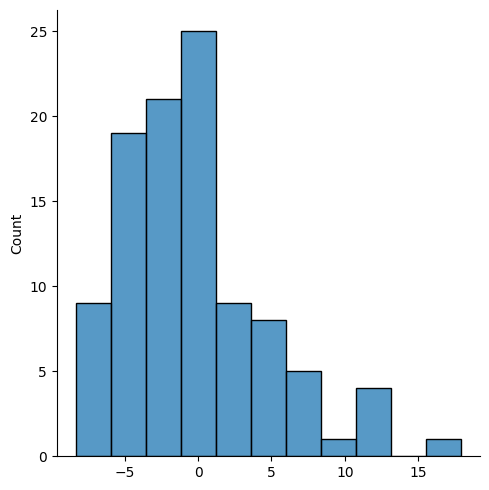

In [114]:
sns.displot(residuals)
plt.show()

# Q-Q plot (Quantile - Quantile plot)

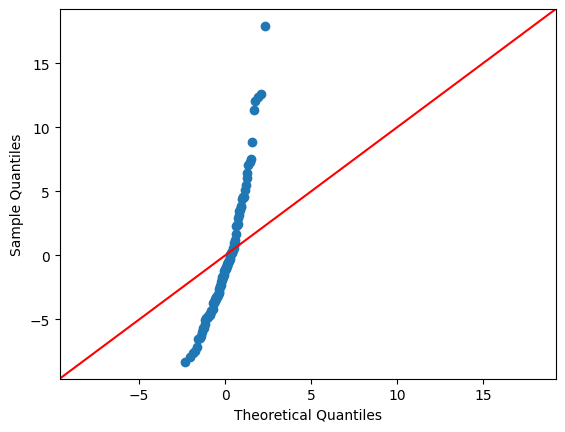

In [116]:
sm.qqplot(residuals,line="45")
py.show()

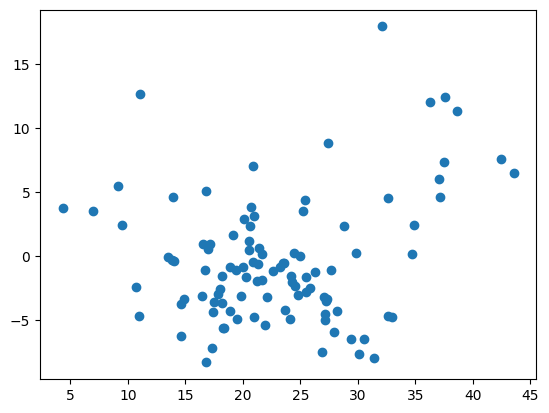

In [118]:
plt.scatter(y_pred,residuals)
plt.show()